## Multiple linear Regression Problem statement 

In [194]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

In [195]:
## Data collection 
df_index = pd.read_csv('C:\\Users\\abhis\\Downloads\\economic_index.csv')
df_index.head(5)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [196]:
# Drop unneccesary columns 
df_index.drop(columns=['Unnamed: 0','year','month']
              ,axis=1,
              inplace=True)


In [197]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [198]:
# check for Null values 
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [200]:
df_index.dtypes

interest_rate        float64
unemployment_rate    float64
index_price            int64
dtype: object

C:\Users\abhis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


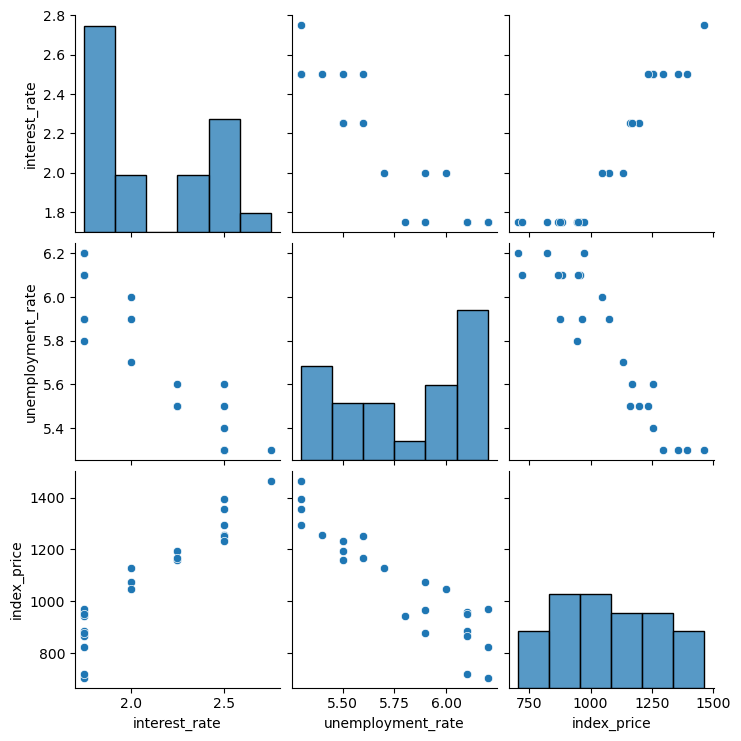

In [201]:
# Lets do the Data visulization 
import seaborn as sns
sns.pairplot(df_index)

In [202]:
# Correlation
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [203]:
df_index.describe()

,interest_rate,unemployment_rate,index_price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


Text(0, 0.5, 'Unemployment rate')

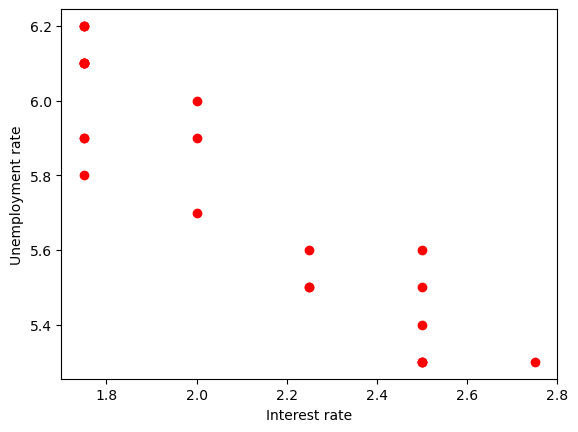

In [204]:
# Visualize Datapoints More closly 
# Scatter plots 
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [205]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

Text(0, 0.5, 'index_price')

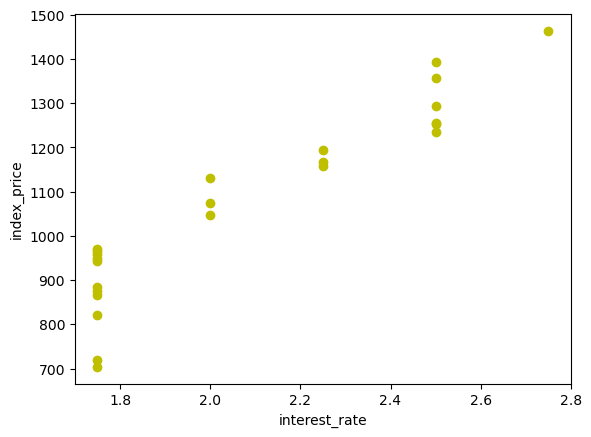

In [206]:
# Scatter plot 
plt.scatter(df_index['interest_rate'],df_index['index_price'],color='y')
plt.xlabel("interest_rate")
plt.ylabel("index_price")

In [207]:
# Getting my Independent and Dependent features ::-
'''X=df_index[['interest_rate','unemployment_rate']]
X'''
### Another import method here Independent Variable 
X=df_index.iloc[:,:-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [208]:
X.shape

(24, 2)

In [209]:
# Independent variable 
y=df_index['index_price']
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [210]:
y.shape

(24,)

In [211]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(
X,y,test_size=0.25,random_state=42
)

print(f" The Size of X_train:{np.array(X_train).shape}")
print(f" The Size of X_test:{np.array(X_test).shape}")
print(f" The Size of y_train:{np.array(y_train).shape}")
print(f" The Size of y_test:{np.array(y_test).shape}")

 The Size of X_train:(18, 2)
 The Size of X_test:(6, 2)
 The Size of y_train:(18,)
 The Size of y_test:(6,)


In [212]:
import seaborn as sns 

<Axes: xlabel='interest_rate', ylabel='index_price'>

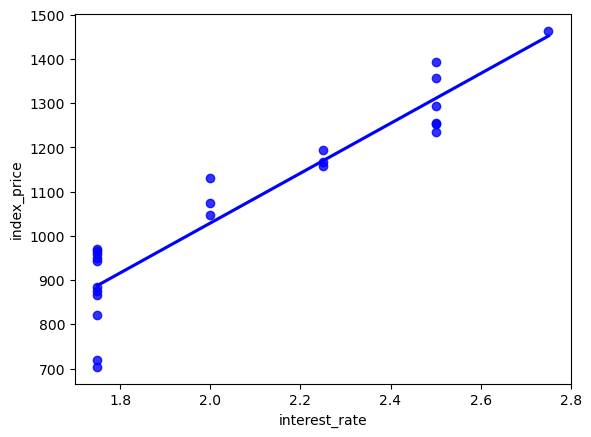

In [214]:
### Need to check 
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'],ci=None,color='blue')

In [215]:
### standard Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [216]:
X_train= scaler.fit_transform(X_train)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [217]:
X_test= scaler.transform(X_test)
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [285]:
### Lineaer Regression 
from sklearn.linear_model import LinearRegression
regression =LinearRegression()

In [286]:
regression.fit(X_train,y_train)

LinearRegression()

In [220]:
print("Coefficient / slope",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient / slope [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443


In [221]:
# Cross Validation 
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,
                                scoring='neg_mean_squared_error',cv=3)

In [222]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [223]:
np.mean(validation_score)

-5914.828180162388

In [224]:
### Prediction of model 
y_pred=regression.predict(X_test)

In [225]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [226]:
# performance metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [227]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"mse::{mse}")
print(f"mae::{mae}")
print(f"rmse::{rmse}")

mse::5793.762887712579
mae::59.935781523235526
rmse::76.11677139574812


In [228]:
## R-sqaure
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
##Adjusted R2 =1 -[(1-R2)*(n-1)/(n-k-1)]
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457142
0.713163015242857


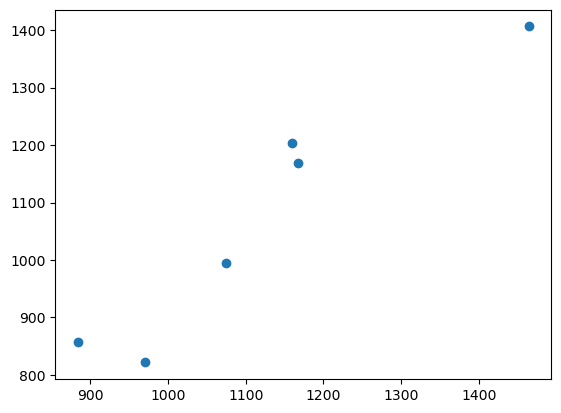

In [229]:
plt.scatter(y_test,y_pred)

In [230]:
# residuals caluculation 
residuals= y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


C:\Users\abhis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


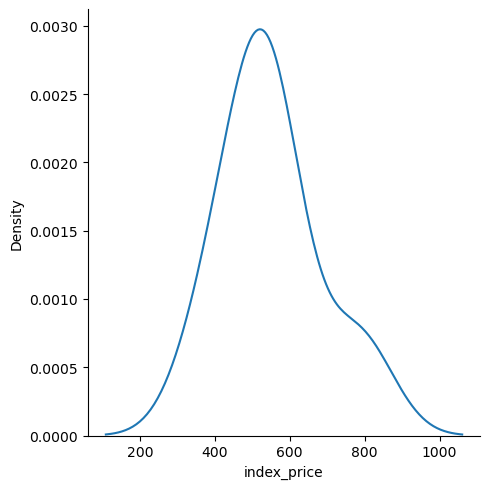

In [189]:
# plot this residuals 
sns.displot(residuals,kind='kde')

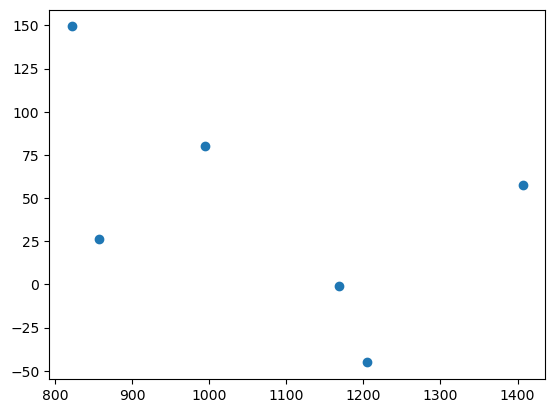

In [231]:
# create a scatter plot with residuals and prediction 
plt.scatter(y_pred,residuals)
### if the data is uniformly distributed then the model is working fine it should not follow any pattern in the scatter plot 

In [232]:
## OLS Linear Regression 
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [233]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                       0.754
Time:                        19:17:22   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\abhis\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [234]:
df_index.head(10)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [192]:
# New data to predict
[[2.75, 5.3]]


[[2.75, 5.3]]

In [148]:
# Predict
predicted_y = model.predict(new_data)
print("Predicted Y:", predicted_y)

Predicted Y: [-373.41287506]


In [256]:
#### Prediction of New Data 
regression.predict(scaler.transform([[2.75,5.4]]))

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1370.45462663])

In [274]:
# Ridge regression:-
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge= Ridge()

params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20]}

ridge_reg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=10)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 20]},
             scoring='neg_mean_squared_error')

In [275]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 1}
-5114.036555633034


In [276]:
ridge_predict=ridge_reg.predict(X_test)
score= r2_score(ridge_predict,y_test)
score

0.8665649798831566

In [279]:
#### Prediction of New Data 
ridge_reg.predict(scaler.transform([[2.75,5.4]]))

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1366.06354502])

In [281]:
df_index.head(5)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [283]:
ridge_reg.predict(scaler.transform([[2.75,5.3]]))

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1399.49873693])

In [290]:
regression.predict(scaler.transform([[2.75,5.3]]))

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1406.51300368])

In [288]:
# Lasso regression:-
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso= Lasso()

params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20]}

lasso_reg = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=10)
lasso_reg.fit(X_train,y_train)

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.183e+04, tolerance: 6.717e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.026e+04, tolerance: 7.056e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.061e+04, toleranc

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 20]},
             scoring='neg_mean_squared_error')

In [289]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 5}
-5267.049747256741


In [291]:
lasso_reg.predict(scaler.transform([[2.75,5.3]]))

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1397.34044593])